# <div align="center"> FAIR 2022 - JupyterLab - practice </div>

# Interface discovery

## Connexion to jupyter-lab 

1. Go to this adress: https://hub.mesocentre.uca.fr/hpc-jupyter/hub/login

    <img src="images/jupyter_welcome.png" alt="drawing" width="1000"/>
2. Ask a jupyter session

     <img src="images/start_server.png" alt="drawing" width="1000"/>
3. Submit on the job queue the session

     <img src="images/job_choice.png" alt="drawing" width="1000"/>
4. Discover your interface    

     <img src="images/jupyter_page.png" alt="drawing" width="1000"/>



## Discover toolbox

    1. From the github repository of the FAIR practice, import the jupyter session part
        - from the web interface
        - from the cluster terminal
    2. Launch the jupyter.ipynb
    3. Launch a console interface
    4. Launch a terminal interface

### Magic command a special case

Jupyter notebook have special commands : `magic commands` and `magic cells` \
The magic command allow you to interact with your environnement to analyse the data
To call it, use the `%` symbol before in a `code cell` \
The list of available magic command is available typing : `%lsmagic`
This command is available only on the line where it is write

The magic cell are cell with specific behaviour due to the magic cell command in the header of the cell
It is use for example to use command from another language (ruby, bash, R...)

1. List the magic commands
2. List folder content using magic command
3. Make a cell with bash code to list conda package in your environment


<details>
  <summary>Magic command solution</summary>
    
1. ```%lsmagic```
2. ```%ls```    
3. 
    
```
%%sh 
conda list env
```
</details>
    

# Make your own Kernel to work
```
Follow the guide from the mesocentre to install your kernel: https://hub.mesocentre.uca.fr/docs/cluster/applis/jupyterhub/
```
1. Install a Python Kernel with python 3.10
2. Install a R kernel with r-base 4.2

# Work with both python and R in the same notebook
```
Jupyter also to work both with python and R in the same notebook
The simple way is to create a conda env with python and R, then install a specific library: rpy2
```
1. In the previous R 4.2 kernel install rpy2 from conda
    - use the terminal interface from jupyter
    - activate the conda env containing your R version
    - install rpy2 from conda
3. Create a new notebook file with the kernel containg R and python
4. Call the rpy2 package
`%load_ext rpy2.ipython`

5. Make a notebook with python and R cells \
`Now to call a R code into a cell use : magic variables %%R`


### Import python libraries

In [1]:
%load_ext rpy2.ipython
import os
import pandas as pd
import numpy as np
import import_ipynb

### Import R libraries

In [2]:
%%R
# load
require(ggplot2)
require(knitr)
require(ade4)
require(kableExtra)
require(adegraphics)
require(gridExtra)

R[write to console]: Le chargement a nécessité le package : ggplot2

R[write to console]: Le chargement a nécessité le package : knitr

R[write to console]: Le chargement a nécessité le package : ade4

R[write to console]: Le chargement a nécessité le package : kableExtra

R[write to console]: Le chargement a nécessité le package : adegraphics

R[write to console]: Registered S3 methods overwritten by 'adegraphics':
  method         from
  biplot.dudi    ade4
  kplot.foucart  ade4
  kplot.mcoa     ade4
  kplot.mfa      ade4
  kplot.pta      ade4
  kplot.sepan    ade4
  kplot.statis   ade4
  scatter.coa    ade4
  scatter.dudi   ade4
  scatter.nipals ade4
  scatter.pco    ade4
  score.acm      ade4
  score.mix      ade4
  score.pca      ade4
  screeplot.dudi ade4

R[write to console]: 
Attachement du package : ‘adegraphics’


R[write to console]: Les objets suivants sont masqués depuis ‘package:ade4’:

    kplotsepan.coa, s.arrow, s.class, s.corcircle, s.distri, s.image,
    s.label, s.l

### Import a dataframe with python

In [3]:
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})
df.transpose()

,0,1,2,3,4,5,6,7,8,9
cups_of_coffee,0,1,2,3,4,5,6,7,8,9
productivity,2,5,6,8,9,8,0,1,0,-1


### Plot the data with ggplot2

/home/pierre/miniconda3/envs/jupyter/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


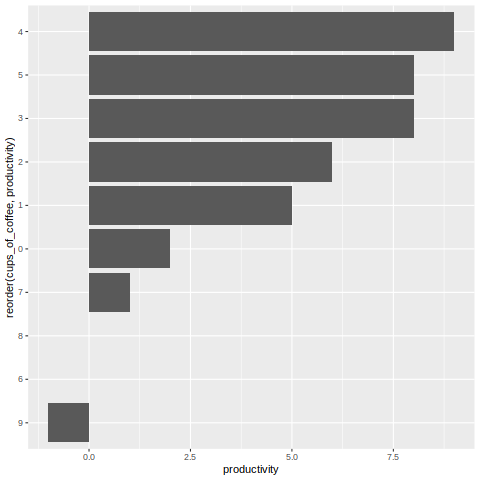

In [4]:
%%R -i df
ggplot(df, aes(x=reorder(cups_of_coffee,productivity), y=productivity)) + geom_col() + coord_flip()

### Repeat the rmarkdown code into jupyter
We try to make the same exercise as in rmarkdown

#### Load the required libraries

In [5]:
%%R
# function to automatically install missing libraries from r-cran or biocmanager

check_rcran_library <- function(rcran_lib="vector of rcran lib required"){
 # list of installed packages
 rcran_lib_require <-  rcran_lib[!(rcran_lib %in% installed.packages()[,"Package"])]
 # installe les librairies manquantes pour R CRAN
 if(length(rcran_lib_require)) install.packages(rcran_lib_require)
 suppressMessages(lapply(rcran_lib, require, character.only = TRUE))
}

check_bioconductor_library <- function(bioconductor_lib="vector of rcran lib required"){
  # list of installed packages
  bioconductor_lib_require <-  bioconductor_lib[!(bioconductor_lib %in% installed.packages()[,"Package"])]
  # installe les librairies manquantes pour R CRAN
  if(length(bioconductor_lib_require)) install.packages(bioconductor_lib_require)
  suppressMessages(lapply(bioconductor_lib, require, character.only = TRUE))
}

In [6]:
%%R
# List of libraries
cran_lib <- c("ggplot2","ade4","kableExtra","adegraphics","gridExtra","IRdisplay")
import_lib = check_rcran_library(rcran_lib = cran_lib)

In [7]:
#### Load the data
%%R
# Load and check your data
file_path <-  "r_data"
doubs_files <- list.files(path=file_path, full.names = T)
doubs <- list()
for (doubs_df in doubs_files){
    tmp_data <- read.table(doubs_df, h =T, sep="\t")
    doubs[[basename(doubs_df)]] <- tmp_data
}

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2617582166.py, line 5)

In [ ]:
#### Make the PCA and visualize
%%R
# Analyses
acp1 <- dudi.pca(doubs$env, scan =  FALSE)
acp2 <- dudi.pca(doubs$fish, scan =  FALSE, scale = FALSE)
# Plot the results
g1 <- scatter(acp2, plot = FALSE)
g2 <- s.value(doubs$xy, acp2$li[,1], plot = FALSE)
ADEgS(c(g1, g2), layout = c(1, 2))

# Example of genomic visualisation

In [ ]:
from coolbox.api import *

DATA_DIR = f"CoolBox/tests/test_data"
test_interval = "chr9:4000000-6000000"
test_itv = test_interval.replace(':', '_').replace('-', '_')

cool1 = Cool(f"{DATA_DIR}/cool_{test_itv}.mcool", cmap="JuiceBoxLike", style='window', color_bar='vertical')
with TrackHeight(2):
    frame = XAxis() + \
        cool1 + Title("Hi-C(.cool)") + \
        TADCoverage(f"{DATA_DIR}/tad_{test_itv}.bed", border_only=True, alpha=1) + Title("HIC with TADs") + \
        Spacer(0.1) + \
        BED(f"{DATA_DIR}/tad_{test_itv}.bed", border_only=True, alpha=1) + Title("TADs") + \
        DiScore(cool1, window_size=30) + Feature(title="Directionality index") + \
        InsuScore(cool1, window_size=30) + Title("Insulation score") + \
        Virtual4C(cool1, "chr9:4986000-4986000") + Title("Virtual4C") + \
        BAMCov(f"{DATA_DIR}/bam_{test_itv}.bam") + Title("BAM Coverage") +\
        Spacer(0.1) + \
        Arcs(f"{DATA_DIR}/bedpe_{test_itv}.bedpe", line_width=1.5) + Title("Arcs(BEDPE)") + \
        Arcs(f"{DATA_DIR}/pairs_{test_itv}.pairs", line_width=1.5) + Inverted() + Title("Arcs(Pairs)") + \
        GTF(f"{DATA_DIR}/gtf_{test_itv}.gtf", length_ratio_thresh=0.005) + TrackHeight(6) + Title("GTF Annotation") + \
        Spacer(0.1) + \
        BigWig(f"{DATA_DIR}/bigwig_{test_itv}.bw") + Title("BigWig") + \
        BedGraph(f"{DATA_DIR}/bedgraph_{test_itv}.bg") + Title("BedGraph") + \
        Spacer(0.1) + \
        BED(f"{DATA_DIR}/bed_{test_itv}.bed") + Feature(height=10, title="BED Annotation")
frame.properties['width'] = 45
frame.goto(test_interval)
frame.show()

# Example of interactive genome visualisation

In [ ]:
from igv_jupyterlab import IGV

# At minimum, IGV requires a single argument, genome.

# For supported genomes, a simple name may be supplied.
IGV(genome="hg19")

# For all other genomes, we must construct a configuration object.
# A helper method supplied to make this easier.
genome = IGV.create_genome(
    name="Human (GRCh38/hg38)",
    fasta_url="https://s3.amazonaws.com/igv.broadinstitute.org/genomes/seq/hg38/hg38.fa",
    index_url="https://s3.amazonaws.com/igv.broadinstitute.org/genomes/seq/hg38/hg38.fa.fai",
    cytoband_url="https://s3.amazonaws.com/igv.broadinstitute.org/annotations/hg38/cytoBandIdeo.txt",
)

igv = IGV(genome=genome)

display(igv)